# EDA
This document runs a basic EDA and data cleaning in order to formulate appropriate classification algorithm and to create a clean dataset to feed as training data. 
At the end of this we will have initial structures of symptoms related tables as below  
    1. Symptoms Table  
    2. Symptoms Relation  
    3. User Symptoms  
As well as basis of the scripts for     
    1. Computing / Updating phi correlation between   
    2. NLP preprocessing to determine probability or similarity of how much given text indicates each symptom 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_excel('data/NF Registry NF1 092420 v2.xls', sheet_name = 'Data')

In [29]:
refs = pd.read_excel('data/NF Registry NF1 092420 v2.xls', sheet_name = 'Report')

Remove the patient ID given there is no duplicates.

In [22]:
df = df.drop('Patient Id', axis = 1)

In [34]:
print(df.shape[0], 'patients data')

8223 patients data


We are interested in the correlations between symptoms.

In [381]:
symptoms = df.iloc[:, 30:-2]

In [382]:
symptoms['pain'] = np.where(df['Has Pain'] == True, 'yes', 'no')

In [383]:
symptoms = symptoms.fillna('')

In [384]:
drop_list = ['Gt Blood Done',
 'Gt Confirmed Nf1',
 'Nf Severity',
 'Spots Where',
 'Itching Details',
 'Itching Treatment',
 'Rx Response',
 'Oral Medication',
 'Cream',
 'Ketotifen',
 'Turmeric',
 'Vitamin',
 'Other',
 'Age Neurofibromas Develop',
 'Nf Treated',
 'Plexiforms Nf Locations',
 'Plexiform Nf Rx',
 'Spinal Nf Rx',
 'Cognitive Interventions',
 'Cognitive Therapy',
 'Optic Glioma Age',
 'Optic Glioma Rx',
 'Mpnst Diagnosed Age',
 'Mpnst Rx',
 'Osteoporosis Rx',
 'Scolosis Type',
 'Scolosis Rx',
 'Bone Bowing Confirmed',
 'Bone Bowing Rx',
 'Alternative Medicines',
 'Alternative Medicines List',
 'Family Nf1',
 'Family Members Nf',
 'Bc Age',
 'Bc Rx',
 'Pregnancy',
 'Pregnancy Nf',
 'Ct Nf1 Participation',
 'Ct Symptoms Rx',
 'Ct Date Enrolled',
 'Other Ct Treatment',
 'Research Nf1',
 'Test Date',
 'Gene',
 'Source Tested',
 'Source Tumor',
 'Test Method',
 'Category',
 'Std Nomenclature',
 'Start Exon',
 'Nucleotide',
 'Amin Acid',
 'Pathogenicity',
 'Frame']

In [385]:
expand_list = [
 'Plexiforms Problems',
 'Adhd',
 'Has Cvs Problems',
 'Has Cyst Tumor',
 'Growth Hormonal Problems',
 'Has Cns Problems',
 'Vision Changes']

In [386]:
yes_list = ['Has Spots',
 'Freckles Armpit',
 'Freckles Groin',
 'Has Itching',
 'Plexiform Nf',
 'Plexiforms Visible',
 'Spinal Nf',
 'Has Cognitive Difficulties',
 'Has Autism Disorder',
 'Optic Glioma Diagnosed',
 'Lisch Nodules',
 'Mpnst',
 'Sphenoid Wing Dysplasia',
 'Fractures',
 'Osteoporosis',
 'Bone Bowing',
 'Breast Cancer', 
 'pain', 
 'Cutaneous Nf No', 
 'Scolosis']

#### Drop list
Remove all non-symptom columns

In [387]:
symptoms = symptoms.drop(drop_list, axis = 1)

#### Yes list
If existing columns are just yes or no, convert them to be binary.

In [388]:
def just_yes(series_):
    return series_.apply(lambda x: 1 if 'yes' in x.lower() else 0)

In [389]:
symptoms[yes_list] = symptoms[yes_list].apply(lambda x: just_yes(x))

### Expand list
For the rest, we will look at them individually.

In [391]:
expand_list

['Plexiforms Problems',
 'Adhd',
 'Has Cvs Problems',
 'Has Cyst Tumor',
 'Growth Hormonal Problems',
 'Has Cns Problems',
 'Vision Changes']

In [392]:
# plexiforms problems
symptoms['bowel or bladder control problem'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'bowel or bladder control' in x.lower() else 0)
symptoms['breathing problem'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'breathing' in x.lower() else 0)
symptoms['Problem with movement'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'movement or ability to walk' in x.lower() else 0)
symptoms['Numbness'] = symptoms['Plexiforms Problems'].apply(lambda x: 1 if 'numbness' in x.lower() else 0)
symptoms = symptoms.drop('Plexiforms Problems', axis = 1)

In [393]:
# ADHD: divide into learning_disability, attention_issue, and ADD/ADHD
symptoms['learning disabilities'] = symptoms['Adhd'].apply(lambda x: 1 if 'learning disabilities' in x.lower() else 0)
symptoms['attention issues'] = symptoms['Adhd'].apply(lambda x: 1 if 'attention issues' in x.lower() else 0)
symptoms['ADD_ADHD'] = symptoms['Adhd'].apply(lambda x: 1 if 'ADD' in x.lower() else 0)
symptoms = symptoms.drop('Adhd', axis = 1)

In [394]:
# Has Cvs Problems
# CVS: heart murmur, vascular or blood vessel issues, high blood pressure, moya moya, heart defect, pulmonic stenosis, 
# heart valve problems, renal artery stenosis

cvs_types = ['heart murmur', 'vascular or blood vessel issues', 'high blood pressure', 
             'moya moya', 'heart defect', 'pulmonic stenosis', 'heart valve problems', 'renal artery stenosis']

for typ in cvs_types: 
    symptoms[typ] = symptoms['Has Cvs Problems'].apply(lambda x: 1 if typ in x.lower() else 0)
symptoms = symptoms.drop('Has Cvs Problems', axis = 1)

In [395]:
# Has Cyst Tumor
cyst_tumor_types = ['adrenal tumor', 'bone cysts', 'brain tumor', 'breast cancer', 'gist', 
                    'gastrointestinal stromal tumors', 'glomus tumors', 'leukemia']

for typ in cyst_tumor_types: 
    symptoms[typ] = symptoms['Has Cyst Tumor'].apply(lambda x: 1 if typ in x.lower() else 0)
symptoms = symptoms.drop('Has Cyst Tumor', axis = 1)

In [396]:
# growth hormonal problems
hormonal_types = ['Chewing/swallowing problems',
                  'Constipation',
                  'Early onset of puberty (prior to the age of 8)',
                  'Hormonal imbalance that affected pregnancy or birth control',
                  'Large head size',
                  'Late onset of puberty (after the age of 17)',
                  'Over (hyper) or under (hypo) active thyroid',
                  'Poor weight gain in childhood',
                  'Reflux or gastroesophageal reflux (GERD)',
                  'Short stature']
for typ in hormonal_types: 
    symptoms[typ] = symptoms['Growth Hormonal Problems'].apply(lambda x: 1 if typ in x else 0)
symptoms = symptoms.drop('Growth Hormonal Problems', axis = 1)

In [397]:
# Has Cns Problems
cns_types = ['Anxiety',
             'Arthritis',
             'Depression',
             'Difficulties with social interactions',
             'Fatigue',
             'Headaches or migraines',
             'Hydrocephalus (extra fluid or "water on the brain")',
             'Joint pain',
             'Loose (hyperextensible) joints',
             'Muscle tone or coordination issues',
             'Other mental health diagnosis',
             'Seizures or epilepsy',
             'Sleep disturbances']
for typ in cns_types: 
    symptoms[typ] = symptoms['Has Cns Problems'].apply(lambda x: 1 if typ in x else 0)

symptoms = symptoms.drop('Has Cns Problems', axis = 1)

In [398]:
# vision changes
symptoms['Vision Changes'] = [1 if x in ['Severe changes', 'Mild changes', 'Moderate changes'] else 0 for x in symptoms['Vision Changes'] ]

In [399]:
# there are two breast cancer columns, combine them
symptoms['Breast Cancer'] = np.where(symptoms['Breast Cancer'] + symptoms['breast cancer'] == 0, 0, 1)
symptoms = symptoms.drop('breast cancer', axis = 1)

In [400]:
# combine two gist columns
symptoms['gastrointestinal stromal tumors'] = np.where(symptoms['gastrointestinal stromal tumors'] + symptoms['gist'] == 0, 0, 1)
symptoms = symptoms.drop('gist', axis = 1)

In [402]:
symptoms.head(5)

,Has Spots,Freckles Armpit,Freckles Groin,Has Itching,Cutaneous Nf No,Plexiform Nf,Plexiforms Visible,Spinal Nf,Has Cognitive Difficulties,Has Autism Disorder,...,Difficulties with social interactions,Fatigue,Headaches or migraines,"Hydrocephalus (extra fluid or ""water on the brain"")",Joint pain,Loose (hyperextensible) joints,Muscle tone or coordination issues,Other mental health diagnosis,Seizures or epilepsy,Sleep disturbances
0,1,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [427]:
# save symptoms
symptoms.to_csv('data/symptoms_existing_data.csv')

# Database Structure
Now we have the symptoms data cleaned. I'll create a symptoms table structure (columns = name, target, description).

In [ ]:
# manual input
key_dict = {}
for i, col in enumerate(symptoms.columns, 1):
    print ('======')
    print (col)
    target = input('Is it a target condition? (y = 1)')
    name = input('Write name: ')
    if target == '1':
        desc = input('Write description: ')
    else: 
        desc = None
    key_dict[i] = {'symptom': name, 'target': target, 'description': desc}
keys = pd.DataFrame(key_dict).T

In [426]:
# save keys
keys.to_csv('data/keys.csv')

## Phi Correlation
We'll compute the correlation map between symptoms.

In [282]:
from sklearn.metrics import matthews_corrcoef

In [283]:
vals = []
for col1 in symptoms.columns: 
    for col2 in symptoms.columns:
        vals.append(matthews_corrcoef(symptoms[col1], symptoms[col2]))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [291]:
vals = np.array(vals).reshape((len(symptoms.columns), len(symptoms.columns)))

In [293]:
vals.shape

(68, 68)

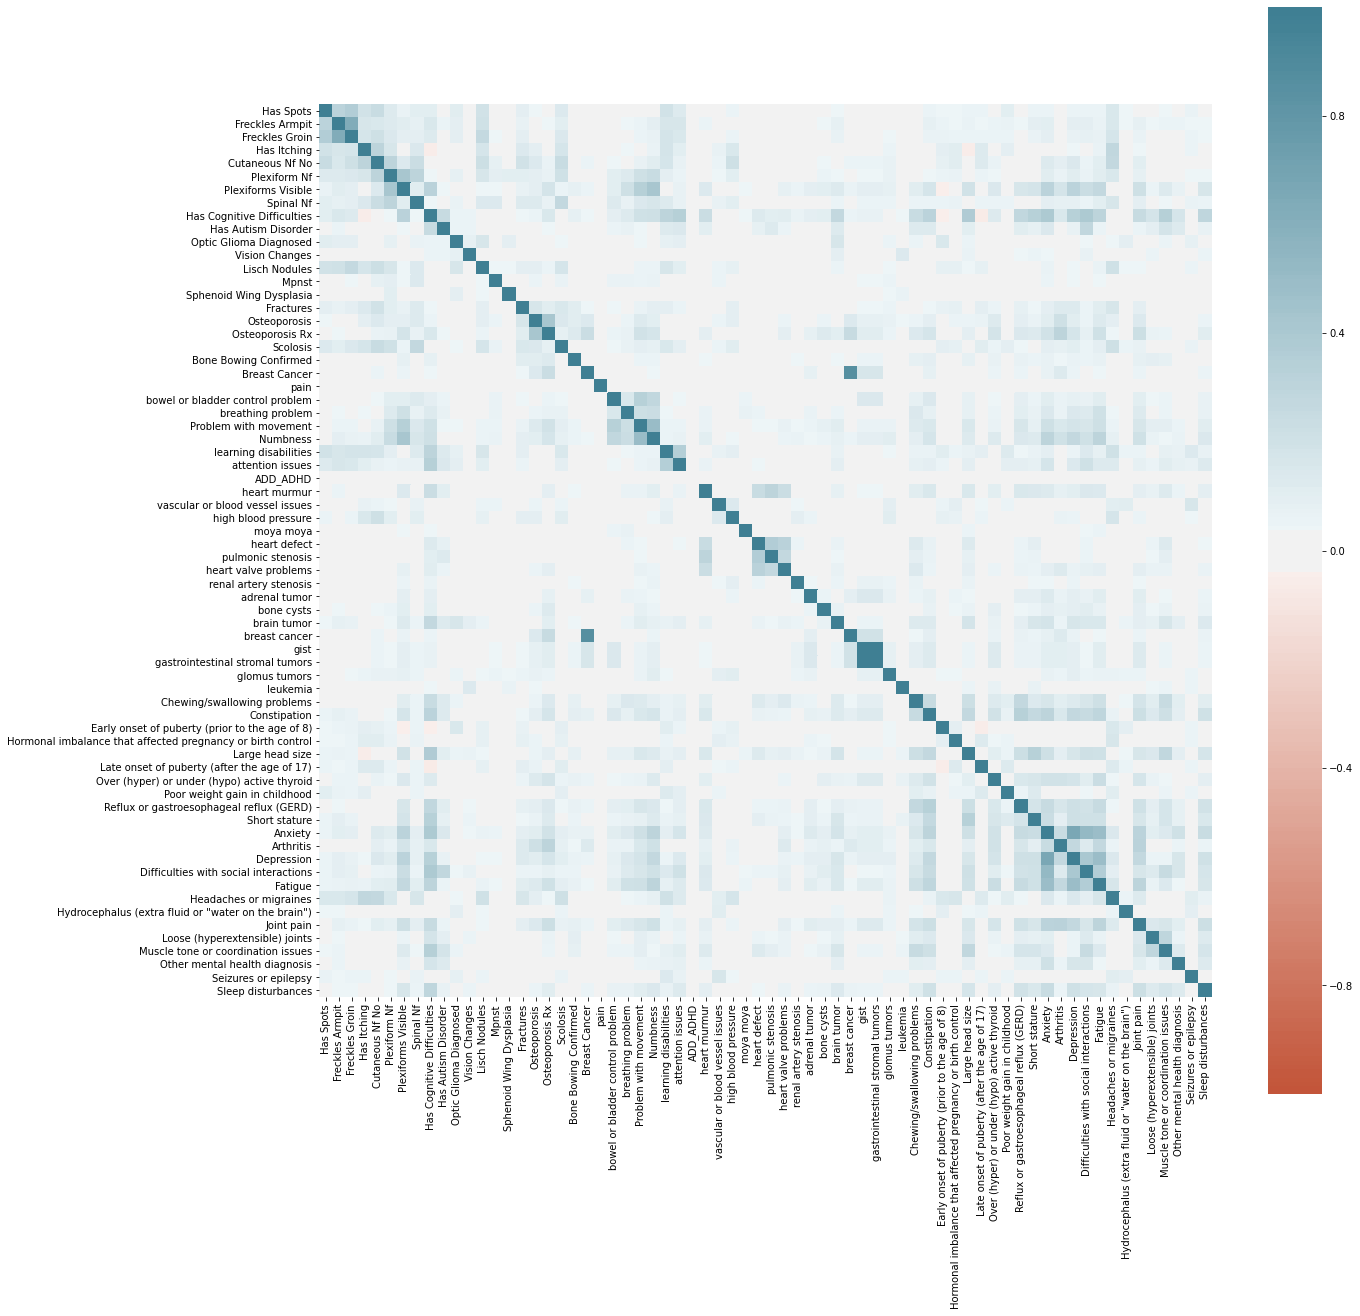

In [300]:
import seaborn as sns
plt.figure(figsize = (20, 20))
ax = sns.heatmap(
    vals, xticklabels = symptoms.columns, yticklabels = symptoms.columns, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [304]:
corr = pd.DataFrame(vals, columns = symptoms.columns, index = symptoms.columns)

In [317]:
tmp = corr.replace(1, np.nan)

In [335]:
dict(tmp['Has Spots'][tmp['Has Spots'] > 0.3].sort_values(ascending = False))

{'Freckles Groin': 0.365917008445203, 'Freckles Armpit': 0.31271929809581384}

In [340]:
high_corr = {}
for col in tmp.columns: 
    high_corr[col] = dict(round(tmp[col][tmp[col] > 0.3].sort_values(ascending = False), 2))

In [341]:
high_corr

{'Has Spots': {'Freckles Groin': 0.37, 'Freckles Armpit': 0.31},
 'Freckles Armpit': {'Freckles Groin': 0.63, 'Has Spots': 0.31},
 'Freckles Groin': {'Freckles Armpit': 0.63, 'Has Spots': 0.37},
 'Has Itching': {'Cutaneous Nf No': 0.3},
 'Cutaneous Nf No': {'Plexiform Nf': 0.31, 'Has Itching': 0.3},
 'Plexiform Nf': {'Plexiforms Visible': 0.43,
  'Cutaneous Nf No': 0.31,
  'Spinal Nf': 0.3},
 'Plexiforms Visible': {'Plexiform Nf': 0.43,
  'Numbness': 0.42,
  'Problem with movement': 0.35,
  'Has Cognitive Difficulties': 0.32,
  'Depression': 0.32,
  'Anxiety': 0.31},
 'Spinal Nf': {'Plexiform Nf': 0.3},
 'Has Cognitive Difficulties': {'Anxiety': 0.39,
  'Difficulties with social interactions': 0.39,
  'Large head size': 0.37,
  'attention issues': 0.34,
  'Muscle tone or coordination issues': 0.34,
  'Short stature': 0.33,
  'Depression': 0.33,
  'Plexiforms Visible': 0.32,
  'Constipation': 0.31,
  'Fatigue': 0.31,
  'learning disabilities': 0.3},
 'Has Autism Disorder': {},
 'Optic G